#**Programación para Doctorado de Bioinformática y Biología de Sistemas**

## Clase 1: Introducción a python

In [1]:
## Básicos de python

print ("Hello, World")

Hello, World!


In [ ]:
# Variables y comentarios
x = 5
y = "Hello, World!"
# comentarios


Este es mi primer notebook de colab

# Python Data Types


*   Text Type: str
*   Numeric Types: int, float, complex
*   Sequence Types: list, tuple, range
*   Mapping Type: dict
*   Set Types: set, frozenset
*   Boolean Type: bool
*   Binary Types: bytes, bytearray, memoryview
*   NoneType




# Listas!

Lists are one of 4 built-in data types in Python used to store collections of data, the other 3 are Dictionary, all with different qualities and usage.

In [2]:
# Lists are created using square brackets
thislist = ["apple", "banana", "cherry"]
print (thislist)

['apple', 'banana', 'cherry']


In [5]:
# Manejo de Strings
seq = "ATCGACTACG"
print (seq[2:])

CGACTACG


In [6]:
# Python Booleans
# It helps us determine whether something is true or false:
print (10 > 9)
print (10 == 9)
print (10 < 9)

True
False
False


# If and else
Python support the usual logical conditions from mathematics:
* Equals: a == b
* Not Equals: a != b
* Less than: a < b
* Less than or equal to: a <= b
* Greater than: a > b
* Greater than or equal to: a >= b


In [7]:
a = 33
b = 200
if b > a:
  print("b: is greater than a")


b: is greater than a


# Loops
While and for loops, allow us to traverse and array

In [8]:
i = 1
while i < 6 :
  print (i)
  i += 1

1
2
3
4
5


# Functions
A function is a block of code which only runs when it is called.
You can pass data, known as parameters, into a function.
A function can return data as a result.

In [9]:
def my_function ():
  print ("Hello from a function")
my_function()

Hello from a function


# Activity 1
What would we have to do to calculate in a DNA sequence the amount of A,T,C,G?


In [19]:
seq = "ATCGAAATTTTAAAAGC"
def calculate_bases (seq):
  seq = seq.upper() # Convert the sequence to uppercase
  count_A = 0
  count_T = 0
  count_C = 0
  count_G = 0
  for i in seq:
    if i == "A":
      count_A += 1
    if i == "T":
      count_T += 1
    if i == "C":
      count_C += 1
    if i == "G":
      count_G += 1
  return count_A, count_T, count_C, count_G


In [21]:
# Example usage
counts = calculate_bases(seq)
print("A:", counts[0])
print("T:", counts[1])
print("C:", counts[2])
print("G:", counts[3])


A: 8
T: 5
C: 2
G: 2


# Activity 2


1.   Generate a random DNA sequence of length N (Try length 50)
2.   Count the number of each nucleotide in the sequence
3.   Compare the expected probability of finding each nucleotide with the ratios in the sequence.



In [26]:
import random

def generate_random_dna(length):
  """Generates a random DNA sequence of specified length."""
  bases = ["A", "T", "C", "G"]
  return "".join(random.choices(bases, k=50))
# # or also works ''.join(random.choice(bases) for _ in range(length)) -->
# generator expression

generate_random_dna(50)

'TCAAGCTGGTTACGTGTCCACGCACGGTGTGTGGGGGATCGTTGCATGGT'

In [56]:
def calculate_bases(seq):
    """Calculates the count of each nucleotide in the sequence."""
    seq = seq.upper()
    counts = {'A': 0, 'T': 0, 'C': 0, 'G': 0}
    for base in seq:
        if base in counts:
            counts[base] += 1
    return counts
#test function
seq = generate_random_dna(50)
f = calculate_bases(seq)
for base, count in f.items():
  print(f"{base}: {count}")

{'A': 17, 'T': 11, 'C': 9, 'G': 13}

In [73]:
def compare_probabilities(seq):
    """Compares the observed nucleotide counts with expected probabilities."""
    expect = 0.25
    probab_real = calculate_bases(seq)
    total = len(seq)

    print("Nucleotide Counts:")
    for base, count in probab_real.items():
      print(f"{base}: {count} ({(count/total):.4f})")

    print(f"\nExpected Probability for each base: {expect}")



compare_probabilities(seq)



Nucleotide Counts:
A: 17 (0.3400)
T: 11 (0.2200)
C: 9 (0.1800)
G: 13 (0.2600)

Expected Probability for each base: 0.25


# Activity 3

1. Getting kmers of 3
2. Save them in a list
3. Translate to aminoacids

In [83]:
def translate_sequence(seq):
    """Translates a DNA sequence into an amino acid sequence.

    Args:
      seq: The DNA sequence as a string.

    Returns:
      The amino acid sequence as a string.
    """
    codon_table = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
    }

    protein = ""

    for i in range(0, len(seq), 3):
      codon = seq[i:i+3]
      if len(codon) % 3 == 0:
        protein += codon_table[codon]
      else:
        print ("The sequence have:" + str(len(seq)) + " pb and the last codon " + str([codon]) + " can`t be translete")
    return protein

seq = "ATCGAGACGATACATGG"
translate_sequence(seq)

The sequence have:17 pb and the last codon ['GG'] can`t be translete


'IETIH'

In [ ]:
print (10 > 20)

False


In [ ]:
## Contador de A, T, C y G
seq = "ATCGAAATTTTAAAAGC"
count_A = 0
count_T = 0
count_C = 0
count_G = 0

for i in range(len(seq)):
  if seq[i] == "A":
    count_A += 1
  if seq[i] == "T":
    count_T += 1
  if seq[i] == "C":
    count_C += 1
  if seq[i] == "G":
    count_G += 1
print ("hay",count_A, "Adeninas")
print ("hay",count_T, "Timinas")
print ("hay",count_C, "Citosinas")
print ("hay",count_G, "Guaninas")

hay 8 Adeninas
hay 5 Timinas
hay 2 Citosinas
hay 2 Guaninas


In [ ]:
# prompt: se puede añadir string a una lista sin la necesidad de agregar un metodo

thislist = ["apple", "banana", "cherry"]
print(thislist)

# You can add a string to a list using the '+' operator.
# This creates a *new* list with the string appended.

new_list = thislist + ["orange"]
print(new_list)


#The original list remains unchanged:
thislist


In [ ]:
seq = "ATCGAAATTTTAAAAGCA"

lista_codones = []
for i in range(0,len(seq),3):
  codon = seq[i:i+3]
  lista_codones.append(codon)
print (lista_codones)



  #lista_codones.append(codon)
#print (lista_codones)

['ATC', 'GAA', 'ATT', 'TTA', 'AAA', 'GCA']


In [ ]:
# prompt: genera un diccionario de codones con su respectiva aminoacidos
def translate(codon):
  codon_aminoacid_dict = {
      'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
      'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
      'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
      'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
      'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
      'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
      'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
      'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
      'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
      'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
      'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
      'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
      'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
      'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
      'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
      'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
      }
  aminoacid = codon_aminoacid_dict[codon]
  return aminoacid


# Funcion que traduzca en codones
seq = "ATCGAAATTTTAAAAGCAATCGACATACAATCGAGACGTAT"
lista_codones = []
seq_aa = ""

for i in range(0,len(seq),3):
  codones = seq[i:i+3]
  seq_aa = seq_aa + translate(codones)

print (seq_aa)


IEILKA


In [ ]:
import matplotlib.pyplot as plt


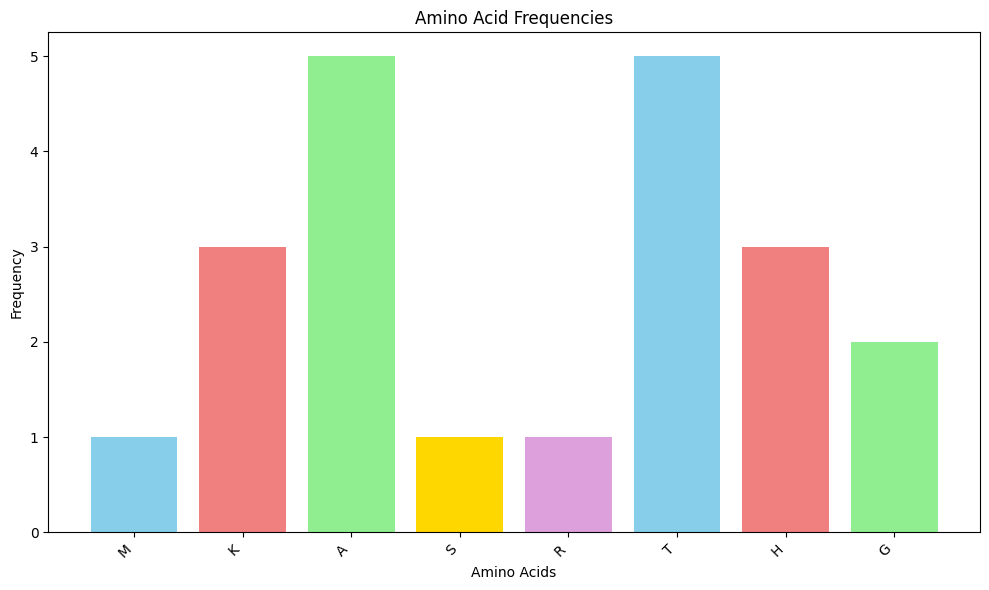

In [ ]:
# prompt: genera un codigo para contar las frecuencias de una secuencia aminoacidica y despues graficar esa secuencia con matplotlib, y usar con diccionario. Editar los colores del grafico

import matplotlib.pyplot as plt

def count_amino_acids(sequence):
  """Counts the frequency of each amino acid in a sequence.
  Args:
      sequence: The amino acid sequence.
  Returns:
      A dictionary where keys are amino acids and values are their frequencies.
  """
  amino_acid_counts = {}
  for amino_acid in sequence:
    amino_acid_counts[amino_acid] = amino_acid_counts.get(amino_acid, 0) + 1
  return amino_acid_counts


def plot_amino_acid_frequencies(amino_acid_counts):
  """Plots the frequencies of amino acids in a sequence.
  Args:
      amino_acid_counts: A dictionary of amino acid frequencies.
  """
  amino_acids = list(amino_acid_counts.keys())
  frequencies = list(amino_acid_counts.values())

  plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
  bars = plt.bar(amino_acids, frequencies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum']) # Example colors

  # Customize the plot
  plt.xlabel("Amino Acids")
  plt.ylabel("Frequency")
  plt.title("Amino Acid Frequencies")
  plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
  plt.tight_layout() # prevent labels from overlapping

  plt.show()


# Example usage
sequence = "MKKAASKARTHTTTTGGHHAA" # Example sequence. Replace with your actual amino acid sequence.
amino_acid_counts = count_amino_acids(sequence)
plot_amino_acid_frequencies(amino_acid_counts)


### echart *texto en cursiva*
### rosalind, ejercicios de bioinformática